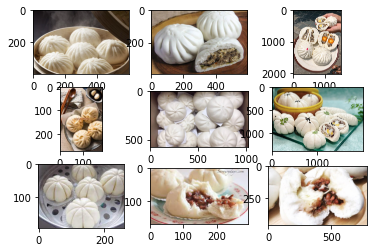

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/dulieu/monanvn/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'banhbao'+str(i+1)+'.bmp'
  
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/dulieu/monanvn/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhbao'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhmi'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhxeo'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('bundaumamtom'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('cakho'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('chagio'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('comtam'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ganuong'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('phobo'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('rauxao'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(100, 200, 200, 3) (100,)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 13s 150ms/step - loss: 6863.3677 - accuracy: 0.1100
Epoch 2/50
4/4 [==============================] - 0s 66ms/step - loss: 1628.2227 - accuracy: 0.0900
Epoch 3/50
4/4 [==============================] - 0s 67ms/step - loss: 94.1922 - accuracy: 0.1800
Epoch 4/50
4/4 [==============================] - 0s 65ms/step - loss: 24.2120 - accuracy: 0.2800
Epoch 5/50
4/4 [==============================] - 0s 66ms/step - loss: 11.9502 - accuracy: 0.1800
Epoch 6/50
4/4 [==============================] - 0s 66ms/step - loss: 2.5067 - accuracy: 0.4000
Epoch 7/50
4/4 [==============================] - 0s 66ms/step - loss: 2.1283 - accuracy: 0.5100
Epoch 8/50
4/4 [==============================] - 0s 66ms/step - loss: 0.9247 - accuracy: 0.7000
Epoch 9/50
4/4 [==============================] - 0s 66ms/step - loss: 0.6544 - accuracy: 0.7700
Epoch 10/50
4/4 [==============================] - 0s 66ms/step - loss: 0.4023 - accuracy: 0.8500
Epoch 11/50
4/4 [=

In [5]:
model.evaluate(photos,labels)

4/4 [==============================] - 0s 35ms/step - loss: 4.2522e-05 - accuracy: 1.0000


[4.252242797520012e-05, 1.0]

In [6]:
model.save('10Foods_Final.h5')

In [7]:
from keras.models import load_model
models=load_model('10Foods_Final.h5')

In [8]:
classes = ["banhbao","banhmi","banhxeo","bundaumamtom","cakho","chagio","comtam","ganuong","phobo","rauxao"]

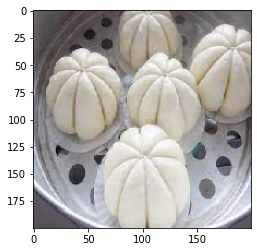

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/dulieu/monanvn/banhbao7.bmp', target_size=(200,200))
plt.imshow(img)

In [18]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.10820885 0.10017382 0.10141341 0.09828339 0.09471648 0.10104206
  0.10038025 0.09848984 0.0999113  0.09738056]]


'banhbao'